# Import Necessary Libraries and modules

In [77]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import plot_model
import seaborn as sns

# Directories of the datasets


In [3]:
train_directory='../input/100-bird-species/train'
val_directory='../input/100-bird-species/valid'
test_directory='../input/100-bird-species/test'

# Rescaling the Images

In [4]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# Using the flow from directory function for reading the images

In [5]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                  batch_size=256,
                                                 class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 batch_size=256,
                                                 color_mode='rgb',
                                                 class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=256,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


# The Dictionary

In [6]:
num_classes=(len(train_generator.class_indices))

In [103]:
train_generator.class_indices

{'AFRICAN FIREFINCH': 0,
 'ALBATROSS': 1,
 'ALEXANDRINE PARAKEET': 2,
 'AMERICAN AVOCET': 3,
 'AMERICAN BITTERN': 4,
 'AMERICAN COOT': 5,
 'AMERICAN GOLDFINCH': 6,
 'AMERICAN KESTREL': 7,
 'AMERICAN PIPIT': 8,
 'AMERICAN REDSTART': 9,
 'ANHINGA': 10,
 'ANNAS HUMMINGBIRD': 11,
 'ANTBIRD': 12,
 'ARARIPE MANAKIN': 13,
 'ASIAN CRESTED IBIS': 14,
 'BALD EAGLE': 15,
 'BALI STARLING': 16,
 'BALTIMORE ORIOLE': 17,
 'BANANAQUIT': 18,
 'BAR-TAILED GODWIT': 19,
 'BARN OWL': 20,
 'BARN SWALLOW': 21,
 'BARRED PUFFBIRD': 22,
 'BAY-BREASTED WARBLER': 23,
 'BEARDED BARBET': 24,
 'BELTED KINGFISHER': 25,
 'BIRD OF PARADISE': 26,
 'BLACK FRANCOLIN': 27,
 'BLACK SKIMMER': 28,
 'BLACK SWAN': 29,
 'BLACK THROATED WARBLER': 30,
 'BLACK VULTURE': 31,
 'BLACK-CAPPED CHICKADEE': 32,
 'BLACK-NECKED GREBE': 33,
 'BLACK-THROATED SPARROW': 34,
 'BLACKBURNIAM WARBLER': 35,
 'BLUE GROUSE': 36,
 'BLUE HERON': 37,
 'BOBOLINK': 38,
 'BROWN NOODY': 39,
 'BROWN THRASHER': 40,
 'CACTUS WREN': 41,
 'CALIFORNIA CONDOR': 42,

# Understanding the Data

In [7]:
breeds=list(train_generator.class_indices.keys())

In [8]:
x=list(train_generator.classes)

In [9]:
label=[]
for i in range (0,225):
    label.append(x.count(i))


# Plotting the Distribution Graphs

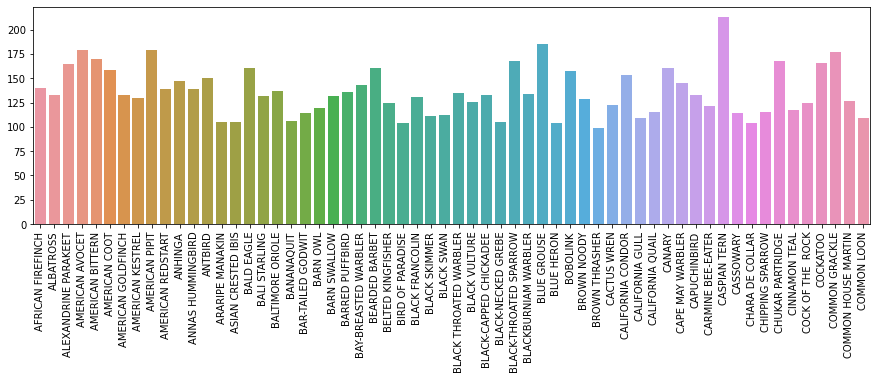

In [94]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[:60],y=label[:60])
plt.xticks(rotation=90)
plt.show()

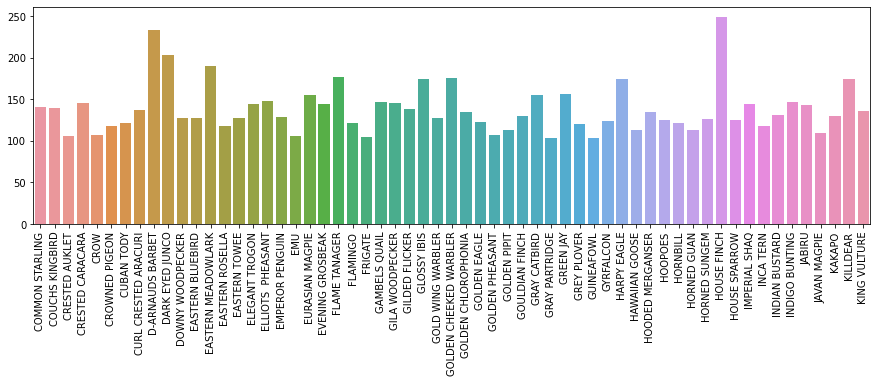

In [95]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[61:120],y=label[61:120])
plt.xticks(rotation=90)
plt.show()

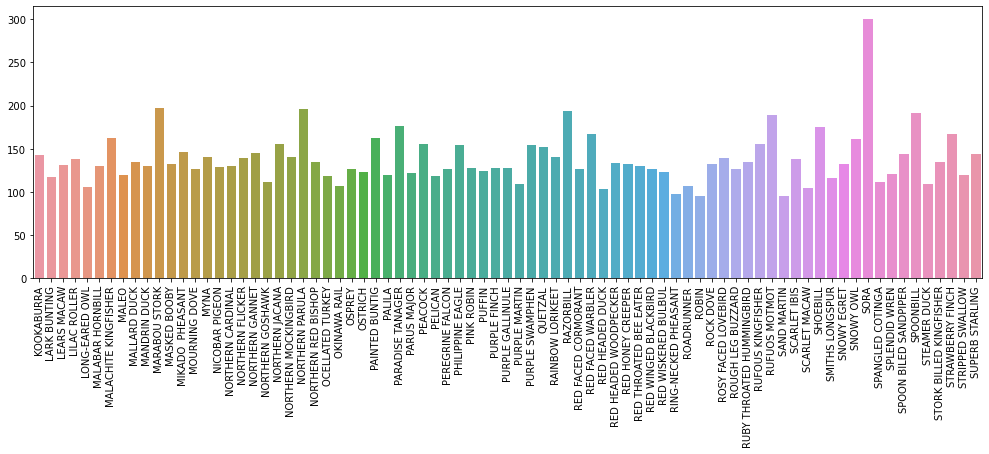

In [99]:
fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[121:200],y=label[121:200])
plt.xticks(rotation=90)
plt.show()

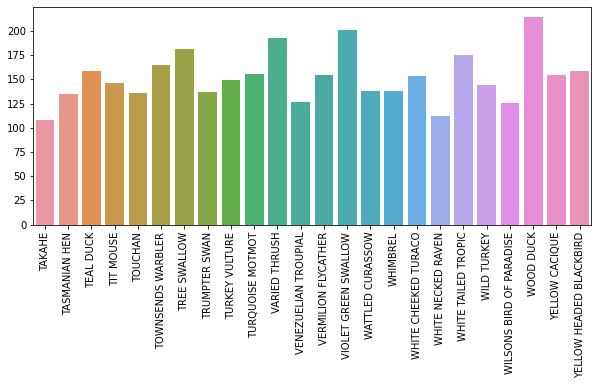

In [102]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[201:],y=label[201:])
plt.xticks(rotation=90)
plt.show()

# Plotting Edges using ImageJ

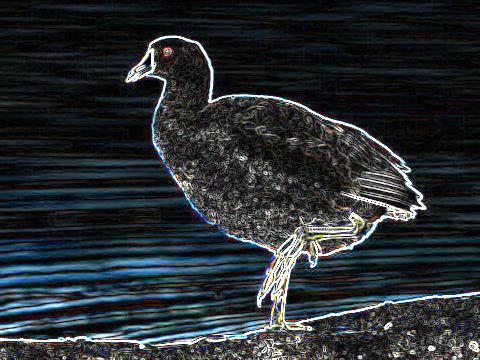

In [62]:
image.load_img('../input/edges-birds/american cootedges.jpg')

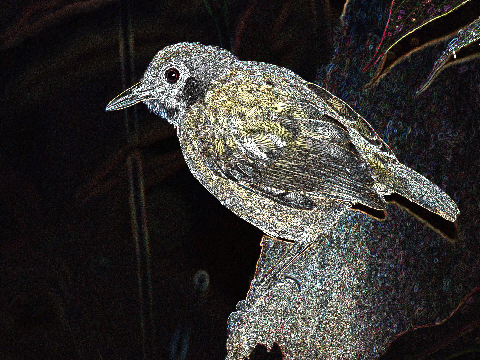

In [63]:
image.load_img('../input/edges-birds/antbirdedges.jpg',target_size=(360,480))

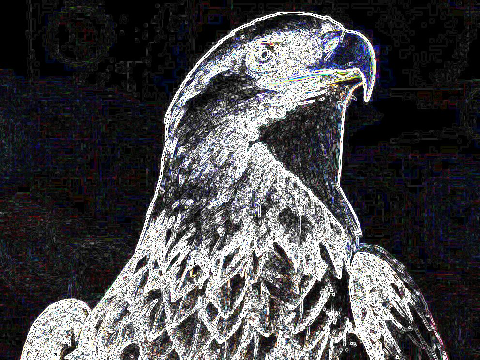

In [64]:
image.load_img('../input/edges-birds/bald eagle edges.jpg',target_size=(360,480))

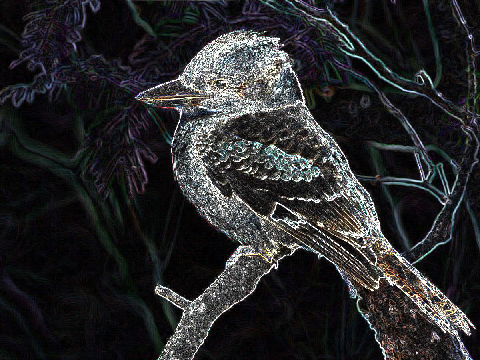

In [65]:
image.load_img('../input/edges-birds/kookaburra edges.jpg',target_size=(360,480))

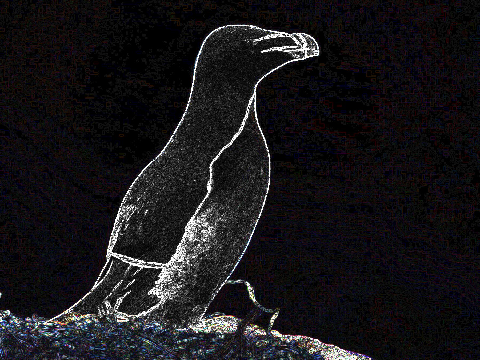

In [66]:
image.load_img('../input/edges-birds/razor billedges.jpg',target_size=(360,480))

# Using Resnet50v2 with imagenet weights

In [13]:
from keras.applications import ResNet50V2

In [14]:
convlayer=ResNet50V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

94674944/94668760 [==============================] - 5s 0us/step


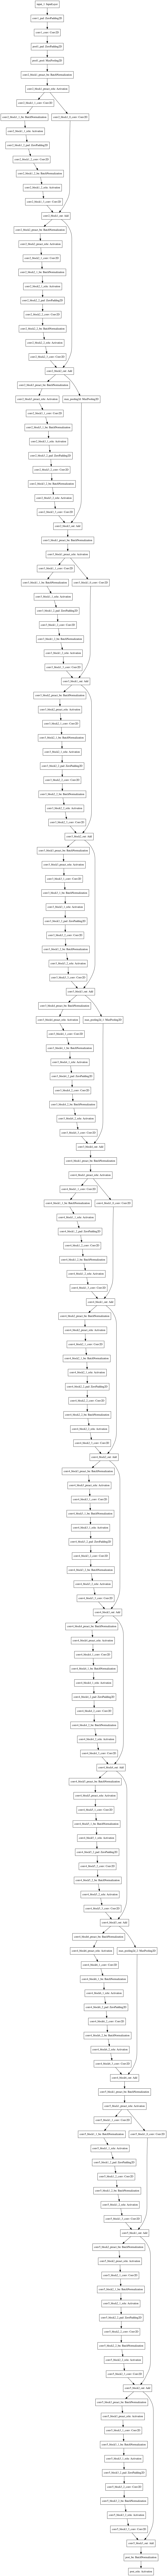

In [15]:
plot_model(convlayer)

# Adding the layer to the Dense Layers

In [16]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

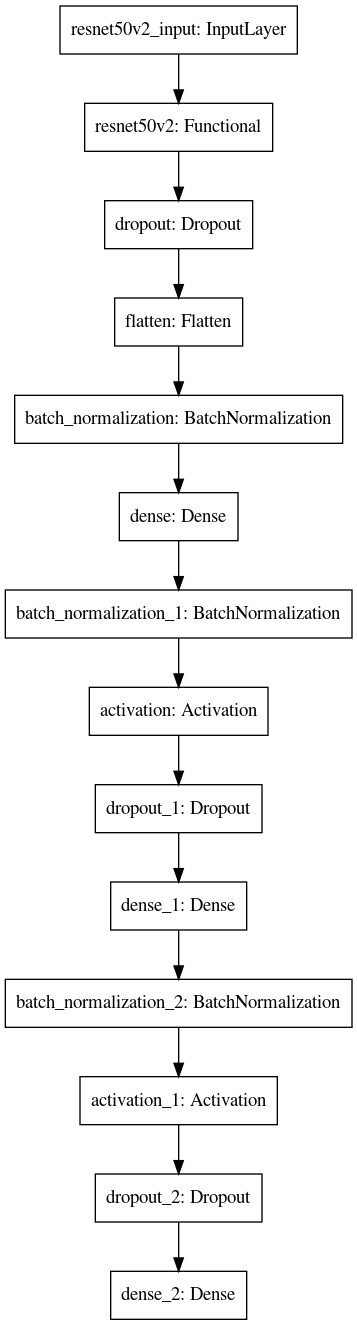

In [17]:
plot_model(model)

# Use a small learning rate for better accuracy

In [18]:
optimizer=keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_generator,epochs=7,validation_data=val_generator)

Epoch 1/7
123/123 [==============================] - 150s 1s/step - loss: 4.0217 - accuracy: 0.2334 - val_loss: 1.4528 - val_accuracy: 0.7404
Epoch 2/7
123/123 [==============================] - 102s 830ms/step - loss: 1.8713 - accuracy: 0.6463 - val_loss: 0.8192 - val_accuracy: 0.8667
Epoch 3/7
123/123 [==============================] - 107s 873ms/step - loss: 1.0154 - accuracy: 0.8231 - val_loss: 0.5393 - val_accuracy: 0.9129
Epoch 4/7
123/123 [==============================] - 116s 942ms/step - loss: 0.5802 - accuracy: 0.9090 - val_loss: 0.3977 - val_accuracy: 0.9324
Epoch 5/7
123/123 [==============================] - 104s 848ms/step - loss: 0.3348 - accuracy: 0.9517 - val_loss: 0.3255 - val_accuracy: 0.9404
Epoch 6/7
123/123 [==============================] - 102s 827ms/step - loss: 0.1948 - accuracy: 0.9763 - val_loss: 0.2752 - val_accuracy: 0.9458
Epoch 7/7
123/123 [==============================] - 101s 817ms/step - loss: 0.1180 - accuracy: 0.9884 - val_loss: 0.2370 - val_accur

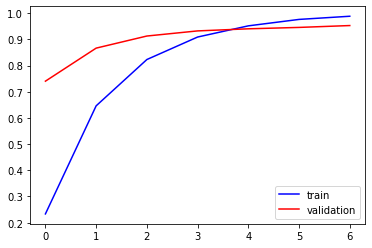

In [49]:
plt.plot(history.history['accuracy'],c='b',label='train')
plt.plot(history.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

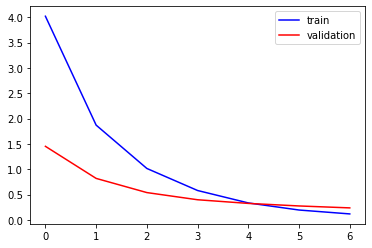

In [52]:
plt.plot(history.history['loss'],c='b',label='train')
plt.plot(history.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()

# Check your Accuracy on the Test set

In [22]:
model.evaluate(test_generator)

5/5 [==============================] - 4s 776ms/step - loss: 0.1926 - accuracy: 0.9636


[0.19257992506027222, 0.9635555744171143]

# Check for Your Own Image

In [23]:
def predict(dir):
    img=image.load_img(dir,target_size=(224,224))
    img1=image.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    pred=int((model.predict_classes(img1)))
    for key,values in train_generator.class_indices.items():
        if pred==values:
            print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(model.predict_proba(img1))*100,2))+"%")
    
    

# Example1

The predicted image of the bird is: AMERICAN KESTREL with a probability of 91.96%


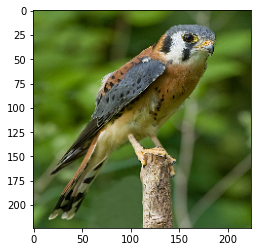

In [29]:
predict('../input/bird-custom-check-data/AmericanKestrel.jpg')

# Example2

The predicted image of the bird is: AMERICAN COOT with a probability of 90.02%


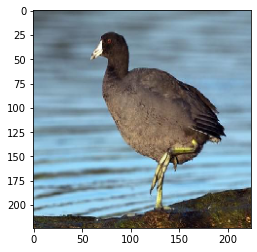

In [31]:
predict('../input/bird-custom-check-data/american coot.jpg')

# Example 3

The predicted image of the bird is: ANHINGA with a probability of 16.08%


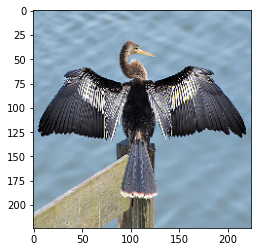

In [32]:
predict('../input/bird-custom-check-data/anhinga.jpg')

# Example 4

The predicted image of the bird is: ANTBIRD with a probability of 39.69%


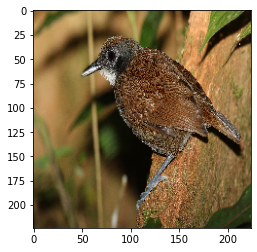

In [33]:
predict('../input/bird-custom-check-data/antbird.jpg')

# Example 5

The predicted image of the bird is: BALD EAGLE with a probability of 99.8%


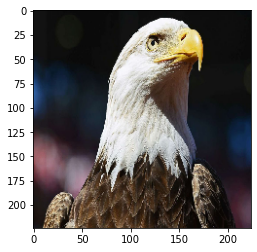

In [34]:
predict('../input/bird-custom-check-data/bald eagle.jpg')

# Example 6

The predicted image of the bird is: BALTIMORE ORIOLE with a probability of 99.96%


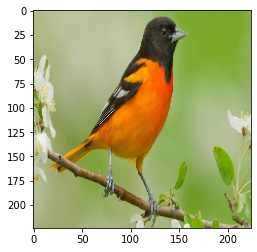

In [35]:
predict('../input/bird-custom-check-data/baltimore oriole.jpg')

# Example 7

The predicted image of the bird is: CASSOWARY with a probability of 98.39%


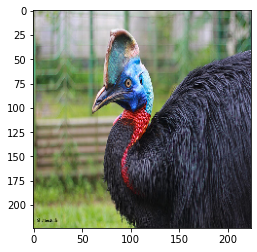

In [37]:
predict('../input/bird-custom-check-data/cassowary.jpg')

# Example 8

The predicted image of the bird is: GOLD WING WARBLER with a probability of 96.85%


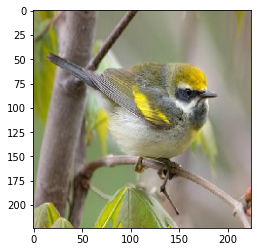

In [38]:
predict('../input/bird-custom-check-data/golden winged warber.jpg')

# Example 9

The predicted image of the bird is: KOOKABURRA with a probability of 49.78%


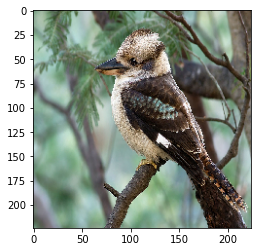

In [40]:
predict('../input/bird-custom-check-data/kookaburra.jpg')

# Example 10

The predicted image of the bird is: OSPREY with a probability of 71.51%


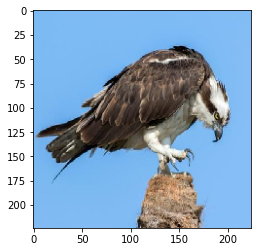

In [41]:
predict('../input/bird-custom-check-data/osprey.jpg')

# Example 11

The predicted image of the bird is: WOOD DUCK with a probability of 98.85%


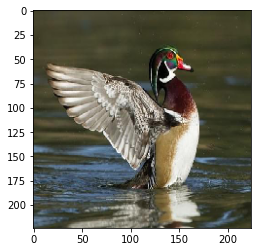

In [42]:
predict('../input/bird-custom-check-data/woodduck.jpg')

# Example 12

The predicted image of the bird is: INCA TERN with a probability of 98.6%


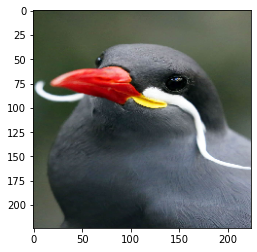

In [39]:
predict('../input/bird-custom-check-data/incatern.jpg')